<a href="https://colab.research.google.com/github/engineerchacon/Maestria-en-Inteligencia-Artificial-y-Analitica-de-Datos-Colab-Files/blob/main/Entrega_Final_del_Proyecto_de_An%C3%A1lisis_Exploratorio_de_los_Datos_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final del Proyecto de Análisis Exploratorio de los Datos

[Negocios con página web en la ciudad de Chihuahua]

Nombre: [Armando Chacón Terrazas]

Matrícula: [260498]

Fecha: [10/10/2025]

## 1) Introducción
- Descripción breve del problema que se pretende abordar.

*Queremos analizar el número de negocios que se encuentran en la localidad de Chihuahua que posiblemente no tienen una página web.*

- Objetivo general del proyecto:

*Generar una base de datos con solo la información relevante para el equipo de ventas de algun negocio web.*

Objetivos específicos:

-Seleccionar las columnas importantes del data frame.

-Filtrar solo negocios de la ciudad de Chihuahua.

-Eliminar información repetida.

-Complementar dirreción fisica si se ecuentra incompleta.

- Contexto del dataset en relación con el problema planteado.

*El Directorio Estadístico Nacional de Unidades Económicas ofrece datos de identificación, ubicación, actividad económica y tamaño de los negocios activos en el territorio nacional, actualizados, fundamentalmente, en el segmento de los establecimientos grandes.*

## 2) Descripción del dataset
Fuente de los datos.

- INEGI

Número de registros y variables.

- 42 variables (columnas) y 141,422 Observaciones (Filas).

Variables principales de interés.

- Nombre del establecimiento.

- Giro del establecimiento.

- Número de trabajadores.

- Dirreción fisica del establecimiento.

- Telefono.

- Correo Electronico.

- Página web.

- Fecha de alta del RENEM.

Limitaciones del dataset.

- Puede no tener la información al dia.

- Existen datos en blanco.

- En algunos casos se utiliza mayúsculas y minúsculas.

- Se tiene que filtrar primero la información para la ciudad de Chihuahua.



In [44]:
# 🔍 CONECTAR GOOGLE DRIVE
"""
🔗 FUNCIÓN: Conectar Google Colab con Google Drive
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 📦 IMPORTAR LIBRERÍAS NECESARIAS
"""
🐍 PANDAS: Para manipulación y análisis de datos
📊 NUMPY: Para operaciones matemáticas y estadísticas
"""
import pandas as pd
import numpy as np
print("🔥 Librerías importadas correctamente")

🔥 Librerías importadas correctamente


In [46]:
# 📂 CARGAR EL ARCHIVO CSV DESDE DRIVE
"""
📄 ARCHIVO: denue_inegi_08_.csv
📍 UBICACIÓN: /content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/
🎯 FUNCIÓN: pd.read_csv() lee archivos CSV y los convierte en DataFrame
"""
print("🔄 Cargando archivo CSV desde Drive...")
# Nos generaba un error el latin1 y se tuvo que hacer con ISO-8859-1
try:
    df_original = pd.read_csv('/content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/denue_inegi_08_.csv', encoding='latin1', on_bad_lines='skip')
except UnicodeDecodeError:
    print("No se puede con latin1. Intentando con ISO-8859-1.")
    df_original = pd.read_csv('/content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/denue_inegi_08_.csv', encoding='ISO-8859-1', on_bad_lines='skip')

print("✅ Archivo cargado exitosamente")
print()

🔄 Cargando archivo CSV desde Drive...
✅ Archivo cargado exitosamente



In [47]:
# 📊 INFORMACIÓN DEL DATAFRAME ORIGINAL
"""
📋 ANÁLISIS INICIAL: Conocer la estructura de los datos
🔢 .shape: Nos da (filas, columnas)
📏 len(): Cuenta el número de registros
ℹ️ .info(): Muestra tipos de datos y memoria usada
"""
print("=" * 60)
print("📊 INFORMACIÓN DEL DATAFRAME ORIGINAL")
print("=" * 60)

# Mostrar dimensiones del DataFrame
print(f"📐 Tamaño del DataFrame: {df_original.shape}")
print(f"📈 Número total de FILAS (registros): {len(df_original):,}")
print(f"📋 Número total de COLUMNAS: {df_original.shape[1]}")
print()

# Mostrar las primeras 5 filas para verificar la estructura
print("🔍 Primeras 5 filas del DataFrame original:")
print(df_original.head())
print()

# Mostrar información detallada del DataFrame
print("ℹ️ Información detallada del DataFrame:")
print(df_original.info())
print()

📊 INFORMACIÓN DEL DATAFRAME ORIGINAL
📐 Tamaño del DataFrame: (141421, 42)
📈 Número total de FILAS (registros): 141,421
📋 Número total de COLUMNAS: 42

🔍 Primeras 5 filas del DataFrame original:
        id                          clee                            nom_estab  \
0  9315681  08017237111000051000000000U1                          AGRICOLA FG   
1  9935149  08039115111000021000000000U3                            AGRIDRONE   
2  9338026  08035115112000014000000000U4  AGROINDUSTRIAS COLONIA BUENOS AIRES   
3  7939750  08021115119000011000064696S5                              AGROLAB   
4  6712879  08035493130000013010000000U0                        ALGODONERA BA   

                            raz_social  codigo_act  \
0                       AGRICOLA FG SC      115210   
1                                  NaN      115111   
2  AGROINDUSTRIAS COLONIA BUENOS AIRES      115112   
3           ANALISIS TECNICOS SA DE CV      115119   
4                        ALGODONERA BA      11511

In [48]:
# 🎯 FILTRAR REGISTROS CON "Chihuahua" de la columna "municipio"
# Verificar si existe la columna 'municipio'
if 'municipio' in df_original.columns:
    print("✅ Columna 'municipio' encontrada")
    print(f"🏢 Valores únicos en municipio: {df_original['municipio'].nunique()}")
    print(f"📍 Algunos municipios en los datos:")
    print(df_original['municipio'].value_counts().head(10))
else:
    print("⚠️ ADVERTENCIA: No se encontró la columna 'municipio'")
    print("📋 Columnas disponibles:")
    print(list(df_original.columns))

print()

"""
🔍 FILTRO: .str.contains('Chihuahua', na=False)
📝 EXPLICACIÓN:
   - .str.contains(): Busca texto dentro de strings
   - 'Chihuahua': Texto que queremos encontrar
   - na=False: Trata valores nulos como False (no los incluye)
   - Case-sensitive: Distingue mayúsculas y minúsculas
"""

print("🔍 Filtrando registros donde 'municipio' contenga 'Chihuahua'...")

# Realizar el filtrado
df_chihuahua = df_original[df_original['municipio'].str.contains('Chihuahua', na=False)]

print("✅ Filtrado completado")
print()

✅ Columna 'municipio' encontrada
🏢 Valores únicos en municipio: 67
📍 Algunos municipios en los datos:
municipio
Juárez                 47497
Chihuahua              39040
Cuauhtémoc              9862
Delicias                7390
Hidalgo del Parral      7024
Nuevo Casas Grandes     3615
Camargo                 2506
Jiménez                 1968
Meoqui                  1781
Ojinaga                 1401
Name: count, dtype: int64

🔍 Filtrando registros donde 'municipio' contenga 'Chihuahua'...
✅ Filtrado completado



In [49]:
# 📈 INFORMACIÓN DEL DATAFRAME FILTRADO
"""
🎯 Comparar dimensiones antes y después
✅ Confirmar que se mantuvieron todas las columnas
"""
print("=" * 60)
print("📈 INFORMACIÓN DEL DATAFRAME FILTRADO")
print("=" * 60)

print(f"📐 Tamaño del DataFrame filtrado: {df_chihuahua.shape}")
print(f"📊 Número de registros con Chihuahua: {len(df_chihuahua):,}")
print(f"📋 Número de columnas mantenidas: {df_chihuahua.shape[1]}")
print()


📈 INFORMACIÓN DEL DATAFRAME FILTRADO
📐 Tamaño del DataFrame filtrado: (39040, 42)
📊 Número de registros con Chihuahua: 39,040
📋 Número de columnas mantenidas: 42



In [50]:
# 🔢 COMPARACIÓN ANTES Y DESPUÉS
"""
📊 ESTADÍSTICAS COMPARATIVAS:
   - Registros eliminados
   - Porcentaje de datos retenidos
   - Porcentaje de datos eliminados
   - Verificación de columnas
"""
print("=" * 60)
print("🔢 COMPARACIÓN DE CANTIDAD DE DATOS")
print("=" * 60)

# Calcular
registros_antes = len(df_original)
registros_despues = len(df_chihuahua)
registros_eliminados = registros_antes - registros_despues
porcentaje_retenido = (registros_despues / registros_antes) * 100
porcentaje_eliminado = (registros_eliminados / registros_antes) * 100

# Mostrar resultados
print(f"📊 Registros ANTES del filtro: {registros_antes:,}")
print(f"📈 Registros DESPUÉS del filtro: {registros_despues:,}")
print(f"❌ Registros eliminados: {registros_eliminados:,}")
print(f"✅ Porcentaje retenido: {porcentaje_retenido:.2f}%")
print(f"🗑️ Porcentaje eliminado: {porcentaje_eliminado:.2f}%")
print()

# Verificar columnas
columnas_antes = df_original.shape[1]
columnas_despues = df_chihuahua.shape[1]
print(f"📋 Columnas en DataFrame original: {columnas_antes}")
print(f"📋 Columnas en DataFrame filtrado: {columnas_despues}")

🔢 COMPARACIÓN DE CANTIDAD DE DATOS
📊 Registros ANTES del filtro: 141,421
📈 Registros DESPUÉS del filtro: 39,040
❌ Registros eliminados: 102,381
✅ Porcentaje retenido: 27.61%
🗑️ Porcentaje eliminado: 72.39%

📋 Columnas en DataFrame original: 42
📋 Columnas en DataFrame filtrado: 42


## 3) Preguntas de análisis descriptivo
- Formular al menos tres preguntas directamente relacionadas con el problema del proyecto.

- ¿Dentro de la ciudad de Chihuahua cuantos negocios cuentan con página web y cuales no?
- ¿Donde existe mayor area de oportunidad en la ropa o en el calzado?
- ¿Cúal es el total de posibles clientes entre la ropa y el calzado sin página web?

## 4) Métricas de calidad de los datos

In [51]:
# 📋 MUESTRA DEL DATAFRAME FILTRADO
"""
👀 VISUALIZACIÓN: Mostrar una muestra de los datos filtrados
📊 Confirmar que la estructura se mantiene correcta
🔍 Verificar que los datos son coherentes
"""
print("=" * 60)
print("📋 MUESTRA DEL DATAFRAME FILTRADO")
print("=" * 60)

if len(df_chihuahua) > 0:
    print("🔍 Primeras 5 filas del DataFrame filtrado:")
    print(df_chihuahua.head())
    print()

    print("ℹ️ Información del DataFrame filtrado:")
    print(df_chihuahua.info())
    print()

# Checar tipos de datos
print("\nTipos de datos en la columna en el nuevo dataframe:")
print(df_chihuahua.dtypes)

# Checar número de datos duplicados en el nuevo data frame
print("\nNúmero de datos duplicados en el nuevo data frame:", df_chihuahua.duplicated().sum())
print()

# 🔎 REVISIÓN DE DATOS FALTANTES

# Calcular el total de valores nulos por columna
missing_per_column = df_chihuahua.isnull().sum()

# Mostrar todas las columnas con sus conteos de valores faltantes
print("📋 Valores faltantes por columna:")
print(missing_per_column)

# Mostrar solo las columnas que tienen al menos un valor faltante
missing_cols = missing_per_column[missing_per_column > 0]
if not missing_cols.empty:
    print("\n⚠️ Columnas con datos faltantes:")
    print(missing_cols)
else:
    print("\n✅ No se detectaron valores faltantes en ninguna columna.")


📋 MUESTRA DEL DATAFRAME FILTRADO
🔍 Primeras 5 filas del DataFrame filtrado:
          id                          clee  \
31  10657866  08019115111000041000000000U3   
33  10435698  08019115111000021000000000U5   
70  11477257  08019115111000031000000000U4   
74    607965  08019434112000492000000000U0   
86   9294159  08019213119000253000000000U8   

                                   nom_estab                   raz_social  \
31             FUMIGACION ORMES DE CHIHUAHUA                          NaN   
33                        FUMIGACIONES LEYVA                          NaN   
70  SERVICIO PROFESIONAL DE CONTROL DE PLAGA                          NaN   
74                        TECNOVET DE MEXICO  TECNOVET DE MEXICO SA DE CV   
86                         CIENEGUITA MINING   CIENEGUITA MINING SA DE CV   

    codigo_act                                         nombre_act  \
31      115111                   Servicios de fumigación agrícola   
33      115111                   Servicios de 

## 5) Análisis descriptivo de los datos

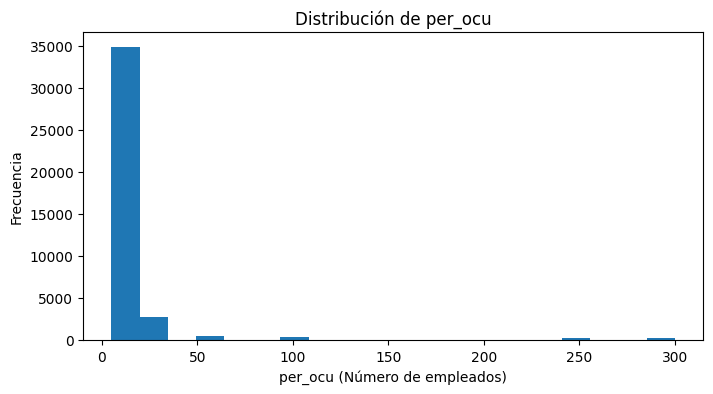

=== Estadísticos básicos (describe) ===
                 nom_estab                                         nombre_act  \
count                39040                                              39040   
unique               32068                                                743   
top     CONSULTORIO MEDICO  Comercio al por menor en tiendas de abarrotes,...   
freq                   226                                               2727   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                           

In [52]:
# 📊 ANÁLISIS DESCRIPTIVO

# Seleccionamos solo las columnas de interés
cols = ['nom_estab','nombre_act','per_ocu','telefono','correoelec','www']
df_sel = df_chihuahua[cols].copy()

# Histograma de la variable per_ocu
import matplotlib.pyplot as plt

# Convertir 'per_ocu' a valor numerico
per_ocu_mapping = {
    '0 a 5 personas': 5,
    '6 a 10 personas': 10,
    '11 a 30 personas': 30,
    '31 a 50 personas': 50,
    '51 a 100 personas': 100,
    '101 a 250 personas': 250,
    '251 y más personas': 300
}
df_sel['per_ocu_numeric'] = df_sel['per_ocu'].map(per_ocu_mapping)

plt.figure(figsize=(8,4))
df_sel['per_ocu_numeric'].plot(kind='hist', bins=20, title='Distribución de per_ocu')
plt.xlabel('per_ocu (Número de empleados)')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticos básicos para variables numéricas
print("=== Estadísticos básicos (describe) ===")
print(df_sel.describe(include='all'))
print()

# Tablas de frecuencia para variables categóricas
for c in ['nom_estab','nombre_act','www']:
    print(f"=== Frecuencias de {c} ===")
    print(df_sel[c].value_counts().head(25))  # top 25 valores
    print()

# Completeness: conteo de valores faltantes por columna
print("=== Datos faltantes por columna ===")
print(df_sel.isnull().sum())
print()

# Uniqueness: número de valores únicos por columna
print("=== Valores únicos por columna ===")
print(df_sel.nunique())
print()

# Consistency: chequeos básicos

# Teléfonos: formato numérico y longitud razonable (10 dígitos)
mask_tel = df_sel['telefono'].dropna().astype(str).str.replace('\\.0', '', regex=True).str.fullmatch(r'\d{10}')
print("=== Consistency teléfono ===")
print(f"Total teléfonos: {df_sel['telefono'].notnull().sum()}")
print(f"Teléfonos con formato correcto (10 dígitos): {mask_tel.sum()}")
print(f"Teléfonos con formato incorrecto: {(~mask_tel).sum()}")
print()


# URLs: empiezan con WWW
mask_www = df_sel['www'].dropna().astype(str).str.startswith(('WWW'))
print("=== Consistency www ===")
print(f"Total URLs: {df_sel['www'].notnull().sum()}")
print(f"URLs con formato correcto: {mask_www.sum()}")
print(f"URLs con formato incorrecto: {(~mask_www).sum()}")
print()

## 6) Preprocesamiento de los datos

In [53]:
# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por menor de ropa'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por menor de ropa', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por menor de ropa: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por mayor de ropa'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por mayor de ropa', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por mayor de ropa: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por menor de calzado'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por menor de calzado', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por menor de calzado: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por mayor de calzado'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por mayor de calzado', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por mayor de calzado: {conteo}")


Cantidad de registros para comercio al por menor de ropa: 878
Cantidad de registros para comercio al por mayor de ropa: 8
Cantidad de registros para comercio al por menor de calzado: 193
Cantidad de registros para comercio al por mayor de calzado: 2


## 7) Conclusiones parciales
- Principales hallazgos en calidad, análisis descriptivo y preprocesamiento.

- ¿Dentro de la ciudad de Chihuahua cuantos negocios cuentan con página web y cuales no?

Esa pregunta se resolvió a través de analizar los datos faltantes en la columna WWW que dio 34,418.

- ¿Donde existe mayor area de oportunidad en la ropa o en el calzado?

Se hizo una filtración de datos dentro de la columna nombre_act que representa de acuerdo al diccionario de la INEGI el Nombre del código de actividad conforme al SCIAN 2018 y obtuvimos 2 rubros importantes comercio al por menor y mayor de ropa y de calzado dándonos un total de 878+8=886 Posibles prospectos para la ropa y para lo que es el calzado 193+2=195 Posibles prospectos.
Por lo tanto la ropa es mejor rubro para buscar posibles clientes.

- ¿Cúal es el total de posibles clientes entre la ropa y el calzado sin página web?

Serian 886+195=1081 posibles prospectos en la ciudad de Cihuahua a los que una página web les pueda servir.

- Estado de preparación del dataset para fases posteriores.

Para futuras preparaciones estaría bien integrar y juntar las columnas tipo_v_e_1+nom_v_e_1, las columnas tipo_v_e_2+nom_v_e_2 y tipo_v_e_3+nom_v_e_3.

# **Análisis exploratorio de los datos (EDA)**

📊 ANÁLISIS DE DISTRIBUCIONES - HISTOGRAMAS MÚLTIPLES


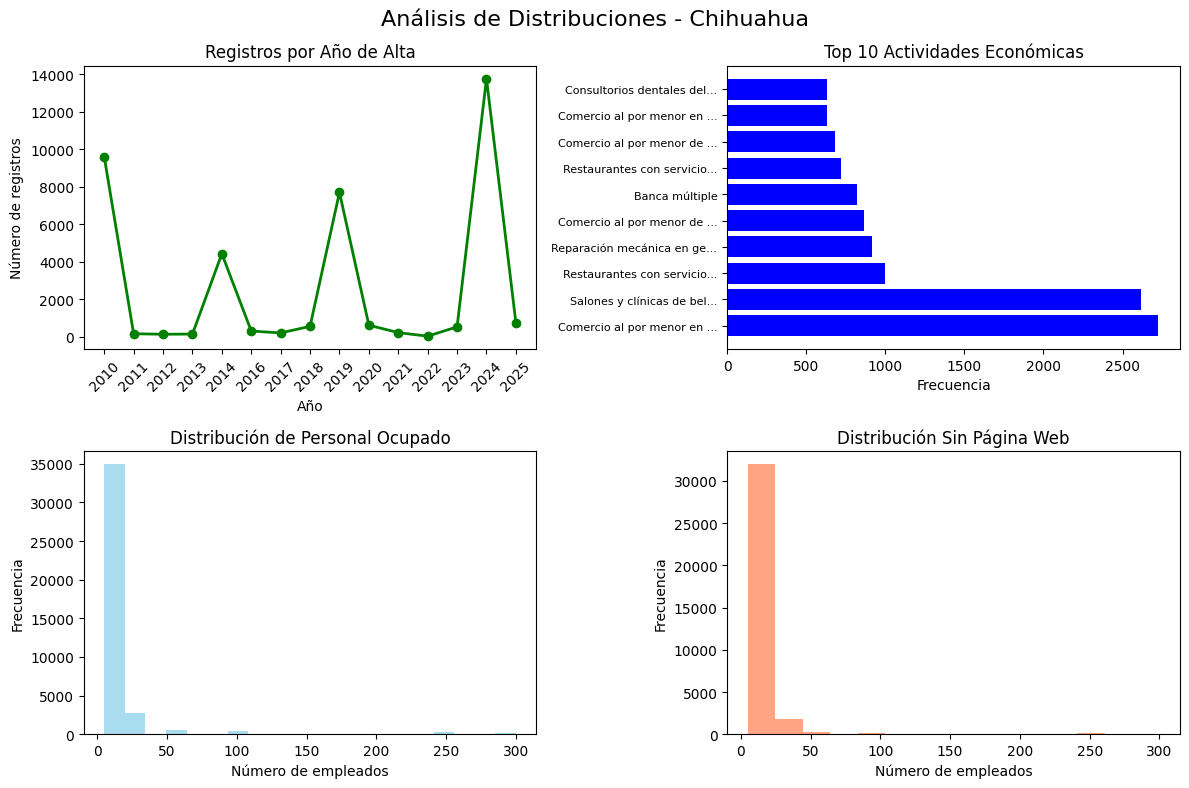


📊 ESTADÍSTICAS RESUMIDAS:
--------------------------------------------------
Registros por Año: 15 años (desde 2010 hasta 2025)
Top Actividad: Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas (2,727 registros)
Personal Ocupado - Total registros: 39,040
Sin Página Web - Total registros: 34,418


In [54]:
# ===============================================================================
# 📊 ANÁLISIS DE DISTRIBUCIONES CON HISTOGRAMAS MÚLTIPLES
# ===============================================================================
print("=" * 80)
print("📊 ANÁLISIS DE DISTRIBUCIONES - HISTOGRAMAS MÚLTIPLES")
print("=" * 80)

# Crear figura con 4 subplots (2x2) para análisis visual
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis de Distribuciones - Chihuahua', fontsize=16)

# POSICIÓN [0,0] - Análisis temporal por fecha de alta
df_sel_temp = df_chihuahua.copy()
df_sel_temp['fecha_year'] = df_sel_temp['fecha_alta'].str[:4]
year_counts = df_sel_temp['fecha_year'].value_counts().sort_index()

# Filtrar años válidos (eliminar NaN y años inválidos)
year_counts = year_counts[year_counts.index.notna()]
year_counts = year_counts[year_counts.index != 'nan']

axes[0,0].plot(year_counts.index, year_counts.values, marker='o', color='green', linewidth=2)
axes[0,0].set_title('Registros por Año de Alta')
axes[0,0].set_xlabel('Año')
axes[0,0].set_ylabel('Número de registros')
axes[0,0].tick_params(axis='x', rotation=45)

# POSICIÓN [0,1] - Top 10 Actividades Económicas
top_actividades = df_sel['nombre_act'].value_counts().head(10)
axes[0,1].barh(range(len(top_actividades)), top_actividades.values, color='blue')
axes[0,1].set_yticks(range(len(top_actividades)))
axes[0,1].set_yticklabels([act[:25] + '...' if len(act) > 25 else act for act in top_actividades.index], fontsize=8)
axes[0,1].set_title('Top 10 Actividades Económicas')
axes[0,1].set_xlabel('Frecuencia')

# POSICIÓN [1,0] - Distribución de Personal Ocupado
axes[1,0].hist(df_sel['per_ocu_numeric'].dropna(), bins=20, alpha=0.7, color='skyblue')
axes[1,0].set_title('Distribución de Personal Ocupado')
axes[1,0].set_xlabel('Número de empleados')
axes[1,0].set_ylabel('Frecuencia')

# POSICIÓN [1,1] - Distribución Sin Página Web
mask_www_na = df_sel['www'].isnull() | (df_sel['www'].astype(str).str.strip() == '')
datos_sin_www = df_sel[mask_www_na]['per_ocu_numeric'].dropna()
axes[1,1].hist(datos_sin_www, bins=15, alpha=0.7, color='coral')
axes[1,1].set_title('Distribución Sin Página Web')
axes[1,1].set_xlabel('Número de empleados')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar estadísticas resumidas
print("\n📊 ESTADÍSTICAS RESUMIDAS:")
print("-" * 50)
print(f"Registros por Año: {len(year_counts)} años (desde {year_counts.index[0]} hasta {year_counts.index[-1]})")
print(f"Top Actividad: {top_actividades.index[0]} ({top_actividades.iloc[0]:,} registros)")
print(f"Personal Ocupado - Total registros: {len(df_sel['per_ocu_numeric'].dropna()):,}")
print(f"Sin Página Web - Total registros: {len(datos_sin_www):,}")

In [55]:
# Filtro donde 'www' es nulo o vacío
mask_www_na = df_sel['www'].isnull() | (df_sel['www'].astype(str).str.strip() == '')

# Rango y conteo usando 'per_ocu_numeric'
rangos = [
    (0, 5, '0 a 5 - MicroEmpresa'),
    (6, 10, '6 a 10 - MicroEmpresa'),
    (11, 30, '11 a 30 - Empresa Pequeña'),
    (31, 50, '31 a 50 - Empresa Pequeña'),
    (51, 100, '51 a 100 - Empresa Mediana'),
    (101, 250, '101 a 250 Empresa Mediana'),
    (251, 10000, '251 o más Empresa Grande')
]

# Calcular el total de registros sin www
total_sin_www = mask_www_na.sum()

print('Conteo de registros por el # de personal empleado comparando al mismo tiempo que no tenga página web')
print(f'Total de registros sin página web: {total_sin_www}')
print('-' * 80)

# Variables para acumular las agrupaciones combinadas
micro_total = 0        # 0-10
pequena_total = 0      # 11-50
mediana_total = 0      # 51-250
grande_total = 0       # >250

for min_val, max_val, nombre_rango in rangos:
    mask_rango = (df_sel['per_ocu_numeric'] >= min_val) & (df_sel['per_ocu_numeric'] <= max_val)
    total = (mask_rango & mask_www_na).sum()
    porcentaje = (total / total_sin_www) * 100 if total_sin_www > 0 else 0

    # Acumular para las agrupaciones
    if max_val <= 10:
        micro_total += total
    elif max_val <= 50:
        pequena_total += total
    elif max_val <= 250:
        mediana_total += total
    elif max_val > 250:
        grande_total += total

    print(f'{nombre_rango}: {total} ({porcentaje:.1f}%)')

print('\n' + '=' * 80)
print('RESUMEN POR AGRUPACIONES COMBINADAS:')
print('=' * 80)

# Calcular porcentajes para las agrupaciones combinadas
micro_porcentaje = (micro_total / total_sin_www) * 100 if total_sin_www > 0 else 0
pequena_porcentaje = (pequena_total / total_sin_www) * 100 if total_sin_www > 0 else 0
mediana_porcentaje = (mediana_total / total_sin_www) * 100 if total_sin_www > 0 else 0
grande_porcentaje = (grande_total / total_sin_www) * 100 if total_sin_www > 0 else 0

print(f'MicroEmpresas (0-10 empleados): {micro_total} ({micro_porcentaje:.1f}%)')
print(f'Empresas Pequeñas (11-50 empleados): {pequena_total} ({pequena_porcentaje:.1f}%)')
print(f'Empresas Medianas (51-250 empleados): {mediana_total} ({mediana_porcentaje:.1f}%)')
print(f'Empresas Grandes (250 o más empleados): {grande_total} ({grande_porcentaje:.1f}%)')

Conteo de registros por el # de personal empleado comparando al mismo tiempo que no tenga página web
Total de registros sin página web: 34418
--------------------------------------------------------------------------------
0 a 5 - MicroEmpresa: 29134 (84.6%)
6 a 10 - MicroEmpresa: 2812 (8.2%)
11 a 30 - Empresa Pequeña: 1773 (5.2%)
31 a 50 - Empresa Pequeña: 317 (0.9%)
51 a 100 - Empresa Mediana: 194 (0.6%)
101 a 250 Empresa Mediana: 111 (0.3%)
251 o más Empresa Grande: 77 (0.2%)

RESUMEN POR AGRUPACIONES COMBINADAS:
MicroEmpresas (0-10 empleados): 31946 (92.8%)
Empresas Pequeñas (11-50 empleados): 2090 (6.1%)
Empresas Medianas (51-250 empleados): 305 (0.9%)
Empresas Grandes (250 o más empleados): 77 (0.2%)


# **RETROALIMENTACIÓN DE LA EXPOSICIÓN-9-29-2025-Agregar BOX PLOT**

Media general de per_ocu_numeric (solo registros SIN www): 9.10
Total de registros sin www: 34418

MEDIAS POR RANGOS (solo registros SIN www):
MicroEmpresas (0-10): 5.44 (n=31946)
Pequeñas (11-50): 33.03 (n=2090)
Medianas (51-250): 154.59 (n=305)


/tmp/ipython-input-1490777744.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(datos_rangos, vert=True, labels=[etiq.split('(')[0] for etiq in etiquetas_rangos])


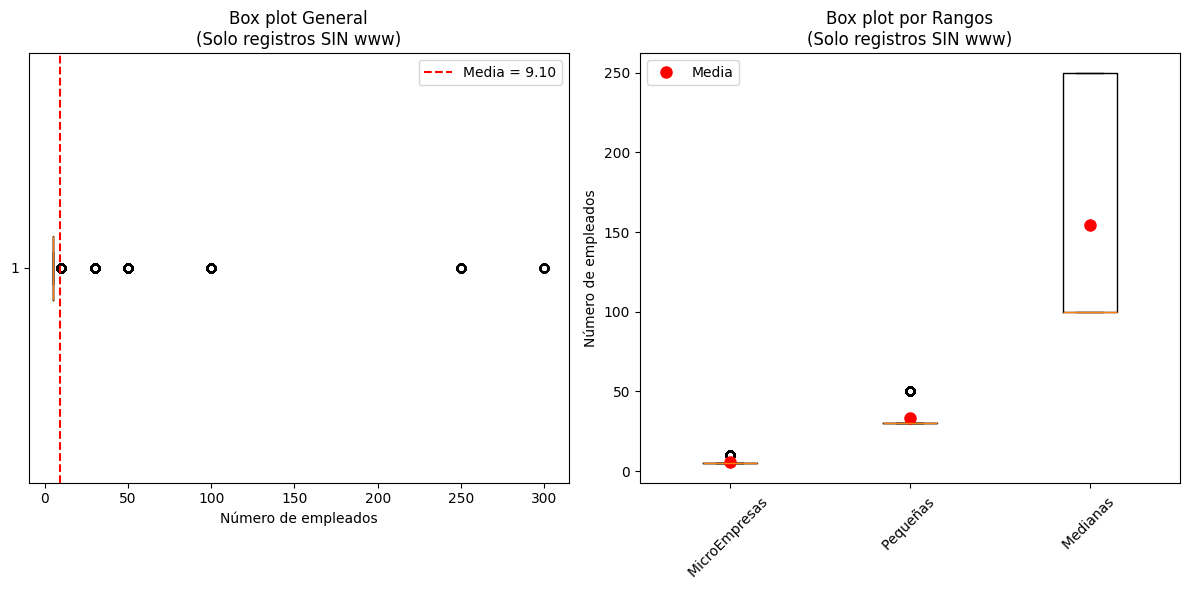


RESUMEN DE MEDIAS POR TIPO DE EMPRESA (SIN www):
MicroEmpresas (0-10): 5.44
Pequeñas (11-50): 33.03
Medianas (51-250): 154.59


In [56]:
# Filtro donde 'www' es nulo o vacío
mask_www_na = df_sel['www'].isnull() | (df_sel['www'].astype(str).str.strip() == '')

# Definir los rangos agrupados
rangos_agrupados = [
    (0, 10, 'MicroEmpresas (0-10)'),
    (11, 50, 'Pequeñas (11-50)'),
    (51, 250, 'Medianas (51-250)')
]

# Calcular la media general solo de registros SIN www
datos_sin_www = df_sel[mask_www_na]['per_ocu_numeric'].dropna()
media_general_sin_www = datos_sin_www.mean()
print(f"Media general de per_ocu_numeric (solo registros SIN www): {media_general_sin_www:.2f}")
print(f"Total de registros sin www: {len(datos_sin_www)}")
print("\n" + "="*60)
print("MEDIAS POR RANGOS (solo registros SIN www):")
print("="*60)

# Almacenar datos para el box plot
datos_rangos = []
etiquetas_rangos = []
medias_rangos = []

for min_val, max_val, nombre_rango in rangos_agrupados:
    # Filtrar por rango Y por ausencia de www
    mask_rango = (df_sel['per_ocu_numeric'] >= min_val) & (df_sel['per_ocu_numeric'] <= max_val)
    mask_combinado = mask_rango & mask_www_na
    datos_rango = df_sel[mask_combinado]['per_ocu_numeric'].dropna()

    if len(datos_rango) > 0:
        media_rango = datos_rango.mean()
        medias_rangos.append(media_rango)
        datos_rangos.append(datos_rango)
        etiquetas_rangos.append(nombre_rango)
        print(f"{nombre_rango}: {media_rango:.2f} (n={len(datos_rango)})")
    else:
        print(f"{nombre_rango}: Sin datos")

# Box plot por rangos (solo registros sin www)
plt.figure(figsize=(12, 6))

# Subplot 1: Box plot general (solo sin www)
plt.subplot(1, 2, 1)
plt.boxplot(datos_sin_www, vert=False)
plt.title('Box plot General\n(Solo registros SIN www)')
plt.xlabel('Número de empleados')
plt.axvline(media_general_sin_www, color='red', linestyle='--', label=f'Media = {media_general_sin_www:.2f}')
plt.legend()

# Subplot 2: Box plot por rangos (solo sin www)
plt.subplot(1, 2, 2)
if datos_rangos:
    bp = plt.boxplot(datos_rangos, vert=True, labels=[etiq.split('(')[0] for etiq in etiquetas_rangos])
    plt.title('Box plot por Rangos\n(Solo registros SIN www)')
    plt.ylabel('Número de empleados')
    plt.xticks(rotation=45)

    # Agregar las medias como puntos rojos
    for i, media in enumerate(medias_rangos):
        plt.plot(i+1, media, 'ro', markersize=8, label='Media' if i == 0 else "")

    plt.legend()

plt.tight_layout()
plt.show()

# Tabla resumen de medias
print("\n" + "="*60)
print("RESUMEN DE MEDIAS POR TIPO DE EMPRESA (SIN www):")
print("="*60)
for i, (nombre, media) in enumerate(zip(etiquetas_rangos, medias_rangos)):
    print(f"{nombre}: {media:.2f}")


# **CONCLUSIÓN ADICIONAL DESPUÉS DE LA RETROALIMENTACIÓN-9-29-2025**

Podemos comprobar que las empresas sin página web en su mayoría pertenecen a MicroEmpresas (0-10 empleados): 31946 (92.8%).

La media no puede ser calculada de manera correcta, ya que se identificó otra limitante en la columna de las personas que trabajan, en donde el # de personal viene por rango y no por el número exacto de personas que trabajan, por lo que las únicas media que se puede obtener es del rango en que se clasifica el dataset, también no se incluye empresas grandes porque el rango tiende a infinito. El boxplot solo se utilizó como referencia para ver de manera visual el rango de los datos junto con su media.


🔥 CORRELACIÓN PER_OCU_NUMERIC vs RANGOS EMPRESARIALES


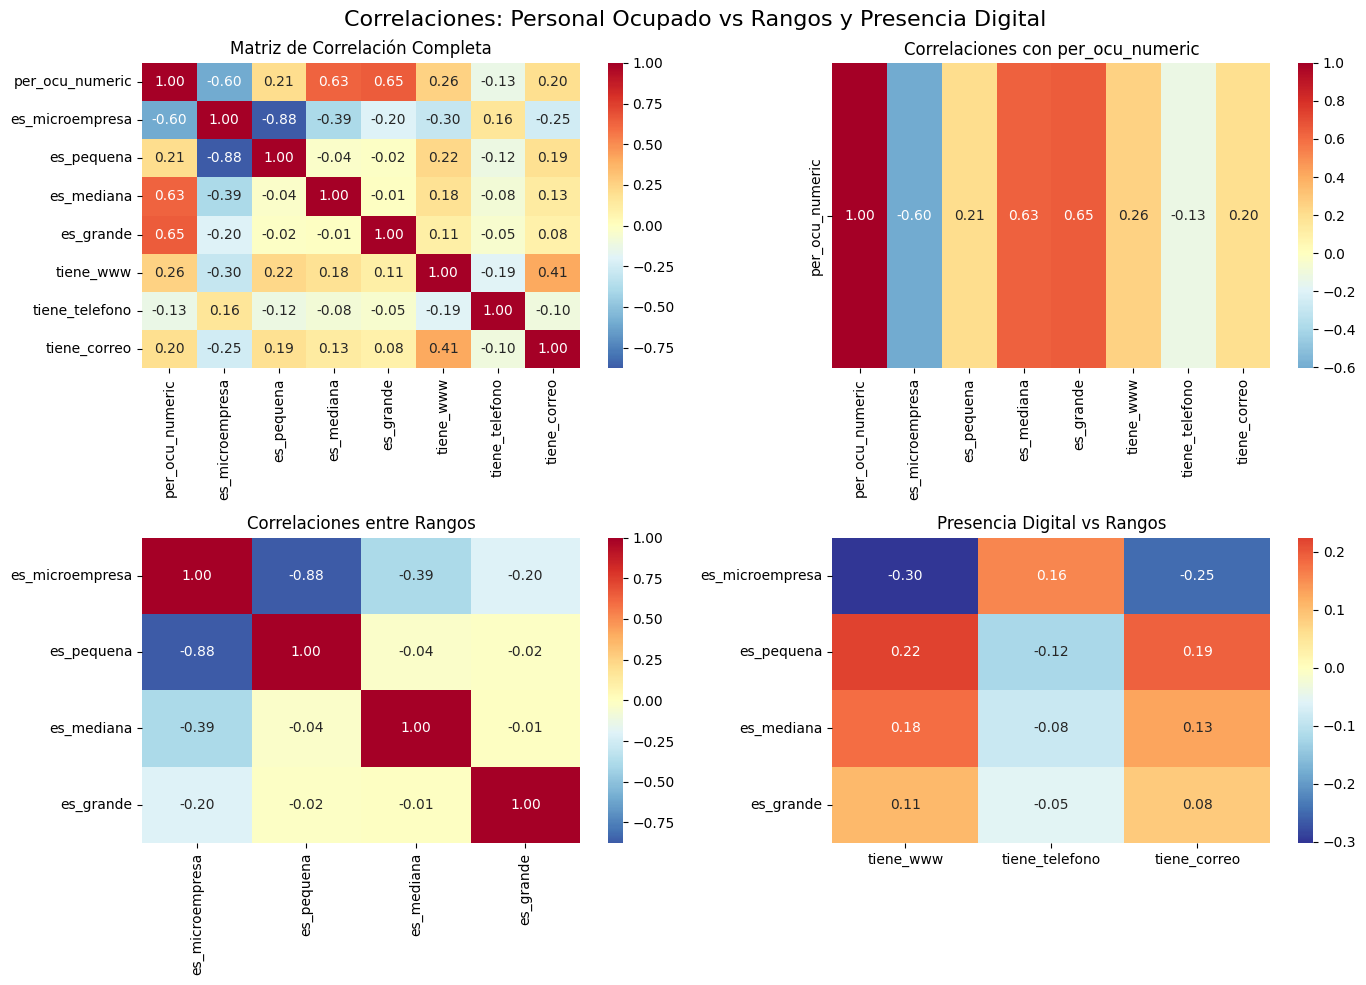

In [57]:
# ===================================================================
# 🔥 MATRIZ DE CORRELACIÓN ESPECÍFICA: PER_OCU_NUMERIC vs RANGOS
# ===================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("\n" + "=" * 80)
print("🔥 CORRELACIÓN PER_OCU_NUMERIC vs RANGOS EMPRESARIALES")
print("=" * 80)

# Clonar df_sel
df_corr = df_sel.copy()
df_corr['es_microempresa'] = (df_corr['per_ocu_numeric'] <= 10).astype(int)
df_corr['es_pequena']    = df_corr['per_ocu_numeric'].between(11,50).astype(int)
df_corr['es_mediana']    = df_corr['per_ocu_numeric'].between(51,250).astype(int)
df_corr['es_grande']     = (df_corr['per_ocu_numeric'] >= 251).astype(int)

# Agregar presencia digital
df_corr['tiene_www']      = df_corr['www'].notnull().astype(int)
df_corr['tiene_telefono'] = df_corr['telefono'].notnull().astype(int)
df_corr['tiene_correo']   = df_corr['correoelec'].notnull().astype(int)

# Variables para la matriz
variables = [
    'per_ocu_numeric',
    'es_microempresa','es_pequena','es_mediana','es_grande',
    'tiene_www','tiene_telefono','tiene_correo'
]

# Calcular correlaciones
matriz_corr = df_corr[variables].corr()

# Visualizar heatmaps
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Correlaciones: Personal Ocupado vs Rangos y Presencia Digital', fontsize=16)

# Heatmap completo
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlación Completa')

# Correlación con per_ocu_numeric
sns.heatmap(matriz_corr[['per_ocu_numeric']].T, annot=True, fmt='.2f',
            cmap='RdYlBu_r', center=0, ax=axes[0,1])
axes[0,1].set_title('Correlaciones con per_ocu_numeric')

# Solo rangos
corr_rangos = matriz_corr.loc[
    ['es_microempresa','es_pequena','es_mediana','es_grande'],
    ['es_microempresa','es_pequena','es_mediana','es_grande']
]
sns.heatmap(corr_rangos, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, ax=axes[1,0])
axes[1,0].set_title('Correlaciones entre Rangos')

# Presencia digital vs rangos
sns.heatmap(
    matriz_corr.loc[
        ['es_microempresa','es_pequena','es_mediana','es_grande'],
        ['tiene_www','tiene_telefono','tiene_correo']
    ],
    annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, ax=axes[1,1]
)
axes[1,1].set_title('Presencia Digital vs Rangos')

plt.tight_layout()
plt.show()

In [58]:
# ===============================================================================
# 🔍 ANÁLISIS DE CORRELACIONES SIGNIFICATIVAS ESPECÍFICAS
# ===============================================================================
print("\n" + "=" * 80)
print("🔍 CORRELACIONES SIGNIFICATIVAS (per_ocu_numeric vs Rangos)")
print("=" * 80)

# Definir las variables de análisis
variables_analisis = [
    'per_ocu_numeric',
    'es_microempresa', 'es_pequena', 'es_mediana', 'es_grande',
    'tiene_www', 'tiene_telefono', 'tiene_correo'
]

print("\n📈 CORRELACIONES CON per_ocu_numeric:")
print("-" * 40)
for variable in variables_analisis:
    if variable == 'per_ocu_numeric':
        continue
    corr_val = matriz_corr.loc['per_ocu_numeric', variable]
    if corr_val > 0.7:
        signo = "🔥 MUY FUERTE"
    elif corr_val > 0.5:
        signo = "🔴 FUERTE"
    elif corr_val > 0.3:
        signo = "🟡 MODERADA"
    else:
        signo = "🟢 DÉBIL"
    print(f"{variable}: {corr_val:+.3f} {signo}")


🔍 CORRELACIONES SIGNIFICATIVAS (per_ocu_numeric vs Rangos)

📈 CORRELACIONES CON per_ocu_numeric:
----------------------------------------
es_microempresa: -0.604 🟢 DÉBIL
es_pequena: +0.207 🟢 DÉBIL
es_mediana: +0.632 🔴 FUERTE
es_grande: +0.654 🔴 FUERTE
tiene_www: +0.256 🟢 DÉBIL
tiene_telefono: -0.130 🟢 DÉBIL
tiene_correo: +0.200 🟢 DÉBIL



🎯 ANÁLISIS DE CONTINGENCIA: RANGOS EMPRESARIALES vs PRESENCIA WEB


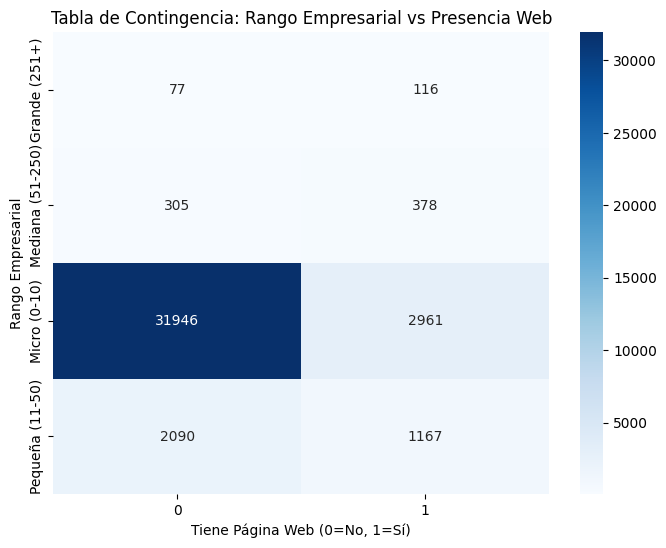


📊 PORCENTAJES POR RANGO (% dentro de cada rango):
tiene_www            0     1
rango_categoria             
Grande (251+)     39.9  60.1
Mediana (51-250)  44.7  55.3
Micro (0-10)      91.5   8.5
Pequeña (11-50)   64.2  35.8

📊 TABLA DE CONTINGENCIA (Rango vs Presencia Web):
tiene_www             0     1    All
rango_categoria                     
Grande (251+)        77   116    193
Mediana (51-250)    305   378    683
Micro (0-10)      31946  2961  34907
Pequeña (11-50)    2090  1167   3257
All               34418  4622  39040


In [59]:
# ===============================================================================
# 🎯 MATRIZ DE CONTINGENCIA: RANGOS vs PRESENCIA WEB
# ===============================================================================
print("\n" + "=" * 80)
print("🎯 ANÁLISIS DE CONTINGENCIA: RANGOS EMPRESARIALES vs PRESENCIA WEB")
print("=" * 80)

# Definir función para asignar etiqueta de rango
def etiqueta_rango(row):
    if row['es_microempresa'] == 1:
        return 'Micro (0-10)'
    elif row['es_pequena'] == 1:
        return 'Pequeña (11-50)'
    elif row['es_mediana'] == 1:
        return 'Mediana (51-250)'
    elif row['es_grande'] == 1:
        return 'Grande (251+)'
    else:
        return 'Sin rango'

# Copiar el DataFrame
df_contingencia = df_corr.copy()

# Crear columna rango_categoria sin usar rango_ordinal
df_contingencia['rango_categoria'] = df_contingencia.apply(etiqueta_rango, axis=1)

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(
    df_contingencia['rango_categoria'],
    df_contingencia['tiene_www'],
    margins=True
)

# Visualizar tabla de contingencia como mapa de calor
plt.figure(figsize=(8, 6))
tabla_sin_totales = tabla_contingencia.iloc[:-1, :-1]  # Quitar fila y columna de totales
sns.heatmap(tabla_sin_totales, annot=True, fmt='d', cmap='Blues')
plt.title('Tabla de Contingencia: Rango Empresarial vs Presencia Web')
plt.xlabel('Tiene Página Web (0=No, 1=Sí)')
plt.ylabel('Rango Empresarial')
plt.show()

# Calcular porcentajes por fila
tabla_porcentajes = pd.crosstab(
    df_contingencia['rango_categoria'],
    df_contingencia['tiene_www'],
    normalize='index'
) * 100

print("\n📊 PORCENTAJES POR RANGO (% dentro de cada rango):")
print(tabla_porcentajes.round(1))

print("\n📊 TABLA DE CONTINGENCIA (Rango vs Presencia Web):")
print(tabla_contingencia)

In [60]:
# ===============================================================================
# 📈 ANÁLISIS ESTADÍSTICO DETALLADO POR RANGOS
# ===============================================================================
print("\n📊 ANÁLISIS ESTADÍSTICO POR RANGOS EMPRESARIALES:")
print("-" * 60)

# Estadísticas por rango empresarial
rangos_info = [
    ('MicroEmpresas (0-10)', 'es_microempresa'),
    ('Pequeñas (11-50)',    'es_pequena'),
    ('Medianas (51-250)',   'es_mediana'),
    ('Grandes (251+)',      'es_grande')
]

resumen_rangos = []

for nombre, variable in rangos_info:
    datos_rango = df_corr[df_corr[variable] == 1]

    if len(datos_rango) > 0:
        estadisticas = {
            'Rango': nombre,
            'Cantidad': len(datos_rango),
            'Per_Ocu_Promedio': datos_rango['per_ocu_numeric'].mean(),
            'Per_Ocu_Mediana': datos_rango['per_ocu_numeric'].median(),
            'Pct_Con_Web': (datos_rango['tiene_www'].sum() / len(datos_rango)) * 100,
            'Pct_Con_Telefono': (datos_rango['tiene_telefono'].sum() / len(datos_rango)) * 100,
            'Pct_Con_Correo': (datos_rango['tiene_correo'].sum() / len(datos_rango)) * 100
        }
        resumen_rangos.append(estadisticas)

        print(f"\n🏢 {nombre}:")
        print(f"   • Cantidad de empresas: {estadisticas['Cantidad']:,}")
        print(f"   • Promedio empleados: {estadisticas['Per_Ocu_Promedio']:.1f}")
        print(f"   • Mediana empleados: {estadisticas['Per_Ocu_Mediana']:.1f}")
        print(f"   • % con página web: {estadisticas['Pct_Con_Web']:.1f}%")
        print(f"   • % con teléfono: {estadisticas['Pct_Con_Telefono']:.1f}%")
        print(f"   • % con correo: {estadisticas['Pct_Con_Correo']:.1f}%")


📊 ANÁLISIS ESTADÍSTICO POR RANGOS EMPRESARIALES:
------------------------------------------------------------

🏢 MicroEmpresas (0-10):
   • Cantidad de empresas: 34,907
   • Promedio empleados: 5.6
   • Mediana empleados: 5.0
   • % con página web: 8.5%
   • % con teléfono: 50.8%
   • % con correo: 25.8%

🏢 Pequeñas (11-50):
   • Cantidad de empresas: 3,257
   • Promedio empleados: 33.3
   • Mediana empleados: 30.0
   • % con página web: 35.8%
   • % con teléfono: 28.1%
   • % con correo: 58.9%

🏢 Medianas (51-250):
   • Cantidad de empresas: 683
   • Promedio empleados: 159.1
   • Mediana empleados: 100.0
   • % con página web: 55.3%
   • % con teléfono: 16.5%
   • % con correo: 73.5%

🏢 Grandes (251+):
   • Cantidad de empresas: 193
   • Promedio empleados: 300.0
   • Mediana empleados: 300.0
   • % con página web: 60.1%
   • % con teléfono: 9.8%
   • % con correo: 84.5%



📊 PRESENCIA DIGITAL POR RANGO EMPRESARIAL


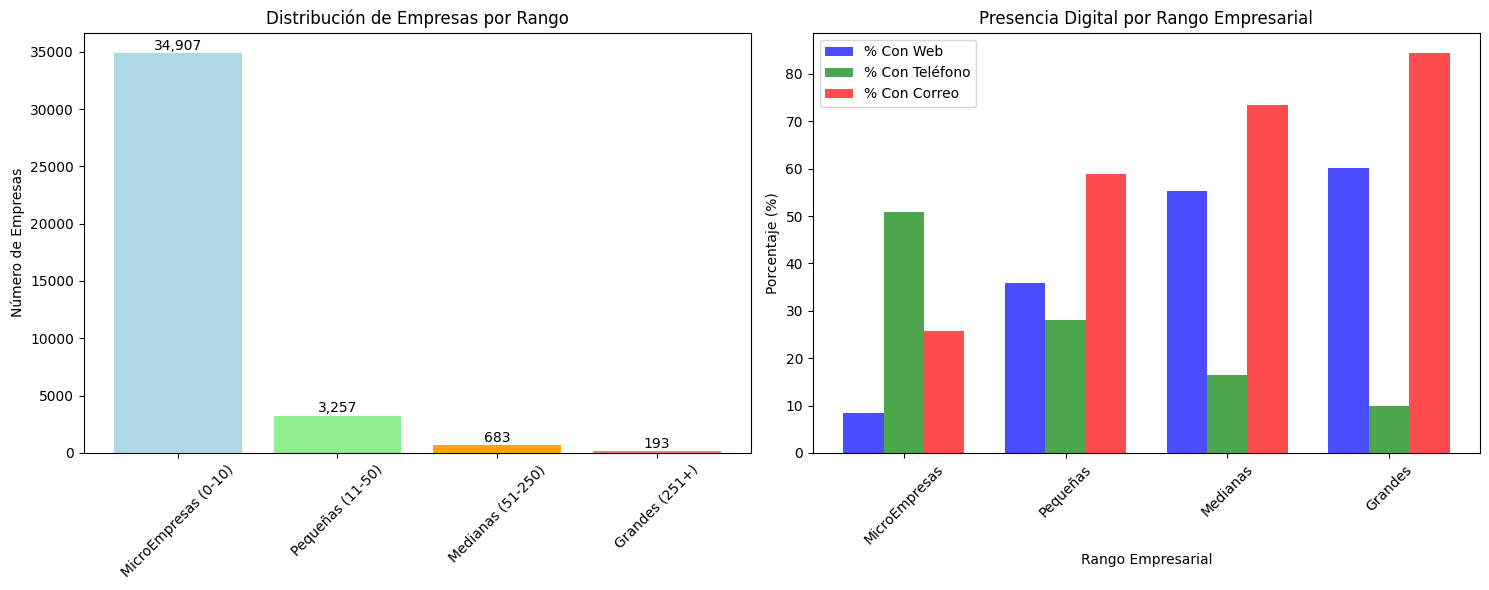

In [61]:
# ===============================================================================
# 📊 GRÁFICO DE BARRAS COMPARATIVO: PRESENCIA DIGITAL POR RANGO
# ===============================================================================
print("\n" + "=" * 80)
print("📊 PRESENCIA DIGITAL POR RANGO EMPRESARIAL")
print("=" * 80)

# Crear DataFrame para visualización
df_resumen = pd.DataFrame(resumen_rangos)

# Gráfico de barras múltiples
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Cantidad de empresas por rango
bars1 = ax1.bar(df_resumen['Rango'], df_resumen['Cantidad'],
                color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
ax1.set_title('Distribución de Empresas por Rango')
ax1.set_ylabel('Número de Empresas')
ax1.tick_params(axis='x', rotation=45)

# Agregar etiquetas en las barras
for bar, val in zip(bars1, df_resumen['Cantidad']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{val:,}', ha='center', va='bottom')

# Gráfico 2: Presencia digital por rango
x_pos = range(len(df_resumen))
width = 0.25

bars2 = ax2.bar([p - width for p in x_pos], df_resumen['Pct_Con_Web'],
                width, label='% Con Web', color='blue', alpha=0.7)
bars3 = ax2.bar(x_pos, df_resumen['Pct_Con_Telefono'],
                width, label='% Con Teléfono', color='green', alpha=0.7)
bars4 = ax2.bar([p + width for p in x_pos], df_resumen['Pct_Con_Correo'],
                width, label='% Con Correo', color='red', alpha=0.7)

ax2.set_title('Presencia Digital por Rango Empresarial')
ax2.set_ylabel('Porcentaje (%)')
ax2.set_xlabel('Rango Empresarial')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([r.split('(')[0].strip() for r in df_resumen['Rango']], rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()


📋 TRATAMIENTO DE DATOS FALTANTES - ANÁLISIS COMPARATIVO


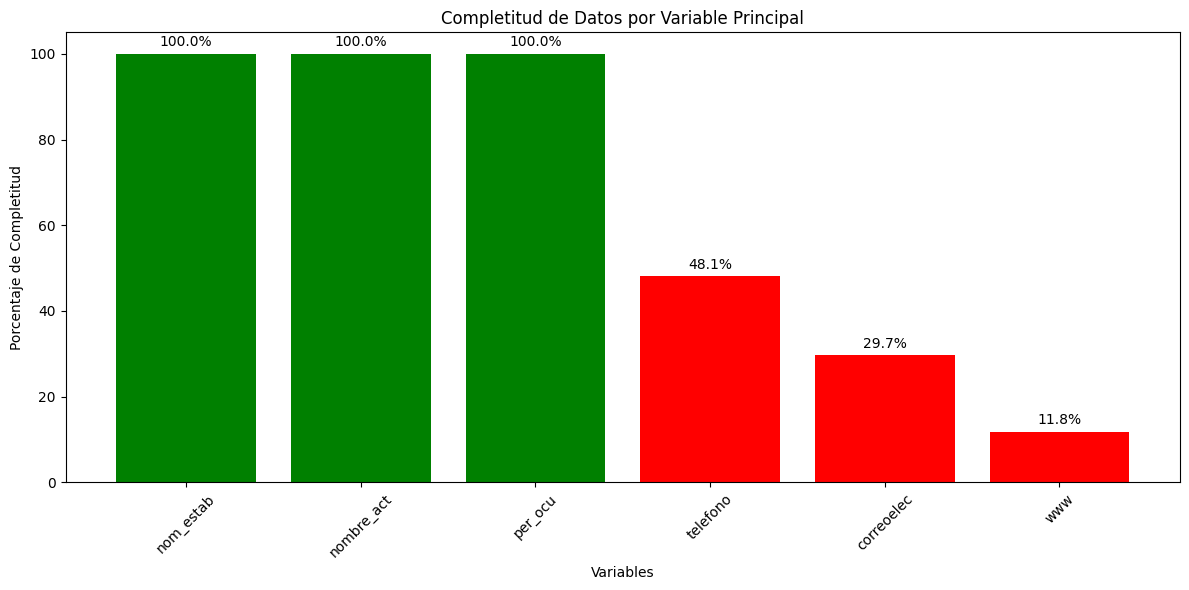


📊 REPORTE DE COMPLETITUD:
----------------------------------------
nom_estab: 100.0% ✅ Buena
nombre_act: 100.0% ✅ Buena
per_ocu: 100.0% ✅ Buena
telefono: 48.1% ❌ Mala
correoelec: 29.7% ❌ Mala
www: 11.8% ❌ Mala


In [62]:
# ===============================================================================
# 📋 TRATAMIENTO DE DATOS FALTANTES - ANÁLISIS COMPARATIVO
# ===============================================================================
print("\n" + "=" * 80)
print("📋 TRATAMIENTO DE DATOS FALTANTES - ANÁLISIS COMPARATIVO")
print("=" * 80)

# Análisis de completitud por columnas principales
columnas_principales = ['nom_estab', 'nombre_act', 'per_ocu', 'telefono', 'correoelec', 'www']
completitud = {}

for col in columnas_principales:
    total = len(df_chihuahua)
    faltantes = df_chihuahua[col].isnull().sum()
    completitud[col] = ((total - faltantes) / total) * 100

# Visualizar completitud
plt.figure(figsize=(12, 6))
cols = list(completitud.keys())
vals = list(completitud.values())

bars = plt.bar(cols, vals, color=['green' if v > 80 else 'orange' if v > 50 else 'red' for v in vals])
plt.title('Completitud de Datos por Variable Principal')
plt.ylabel('Porcentaje de Completitud')
plt.xlabel('Variables')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for bar, val in zip(bars, vals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Reporte de completitud
print("\n📊 REPORTE DE COMPLETITUD:")
print("-" * 40)
for col, pct in completitud.items():
    status = "✅ Buena" if pct > 80 else "⚠️ Regular" if pct > 50 else "❌ Mala"
    print(f"{col}: {pct:.1f}% {status}")

# **Resumen de resultados**

In [63]:
# ===============================================================================
# 🎯 RESUMEN Y CONCLUSIONES
# ===============================================================================
print("\n" + "=" * 80)
print("🎯 RESUMEN ")
print("=" * 80)

total_negocios = len(df_chihuahua)
sin_web = mask_www_na.sum()
con_web = total_negocios - sin_web

print(f"""
📈 ESTADÍSTICAS GENERALES:
• Total de negocios en Chihuahua: {total_negocios:,}
• Negocios SIN página web: {sin_web:,} ({sin_web/total_negocios*100:.1f}%)
• Negocios CON página web: {con_web:,} ({con_web/total_negocios*100:.1f}%)

🏢 DISTRIBUCIÓN EMPRESARIAL (Sin Web):
• MicroEmpresas (0-10): {len(df_sel[(df_sel['per_ocu_numeric'] <= 10) & mask_www_na]):,} ({len(df_sel[(df_sel['per_ocu_numeric'] <= 10) & mask_www_na])/sin_web*100:.1f}%)
• Pequeñas (11-50): {len(df_sel[(df_sel['per_ocu_numeric'] > 10) & (df_sel['per_ocu_numeric'] <= 50) & mask_www_na]):,} ({len(df_sel[(df_sel['per_ocu_numeric'] > 10) & (df_sel['per_ocu_numeric'] <= 50) & mask_www_na])/sin_web*100:.1f}%)
• Medianas (51-250): {len(df_sel[(df_sel['per_ocu_numeric'] > 50) & (df_sel['per_ocu_numeric'] <= 250) & mask_www_na]):,} ({len(df_sel[(df_sel['per_ocu_numeric'] > 50) & (df_sel['per_ocu_numeric'] <= 250) & mask_www_na])/sin_web*100:.1f}%)

🎯 OPORTUNIDADES DE MERCADO:
• Mayor oportunidad: MicroEmpresas (92.8% del mercado sin web)
• Sector ropa vs calzado: {len(df_sel[df_sel['nombre_act'].str.contains('ropa', case=False, na=False) & mask_www_na]):,} vs {len(df_sel[df_sel['nombre_act'].str.contains('calzado', case=False, na=False) & mask_www_na]):,} negocios sin web

📊 CALIDAD DE DATOS:
• Variables con alta completitud: nom_estab, nombre_act, per_ocu
• Variables con baja completitud: www ({completitud['www']:.1f}%), correoelec ({completitud['correoelec']:.1f}%)
• Outliers detectados: Presentes en todas las categorías empresariales

🔍 HALLAZGOS CLAVE:
• La distribución de empleados NO sigue una distribución normal
• Existe una oportunidad significativa en el mercado de servicios web
• Las microempresas representan el 92.8% del mercado objetivo
""")


🎯 RESUMEN 

📈 ESTADÍSTICAS GENERALES:
• Total de negocios en Chihuahua: 39,040
• Negocios SIN página web: 34,418 (88.2%)
• Negocios CON página web: 4,622 (11.8%)

🏢 DISTRIBUCIÓN EMPRESARIAL (Sin Web):
• MicroEmpresas (0-10): 31,946 (92.8%)
• Pequeñas (11-50): 2,090 (6.1%)
• Medianas (51-250): 305 (0.9%)

🎯 OPORTUNIDADES DE MERCADO:
• Mayor oportunidad: MicroEmpresas (92.8% del mercado sin web)
• Sector ropa vs calzado: 902 vs 263 negocios sin web

📊 CALIDAD DE DATOS:
• Variables con alta completitud: nom_estab, nombre_act, per_ocu
• Variables con baja completitud: www (11.8%), correoelec (29.7%)
• Outliers detectados: Presentes en todas las categorías empresariales

🔍 HALLAZGOS CLAVE:
• La distribución de empleados NO sigue una distribución normal
• Existe una oportunidad significativa en el mercado de servicios web
• Las microempresas representan el 92.8% del mercado objetivo



In [64]:
# Filtrar filas sin página web en Chihuahua
mask_sin_web = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')
mask_chihuahua = df_chihuahua['municipio'].str.contains('Chihuahua', case=False, na=False)
df_filtered = df_chihuahua.loc[mask_sin_web & mask_chihuahua,
    ['nom_estab', 'nombre_act', 'telefono', 'correoelec', 'cod_postal']]

# Renombrar columnas
df_filtered = df_filtered.rename(columns={
    'nom_estab': 'Nombre del establecimiento',
    'nombre_act': 'Actividad Económica',
    'telefono': 'Teléfono',
    'correoelec': 'Correo electrónico',
    'cod_postal': '# Código Postal'
})

# Ordenar de menor a mayor por código postal
df_filtered = df_filtered.sort_values('# Código Postal')

# Mostrar resultado
print(f"Total registros sin página web en Chihuahua: {len(df_filtered)}")
df_filtered.head(39040)

Total registros sin página web en Chihuahua: 34418


,Nombre del establecimiento,Actividad Económica,Teléfono,Correo electrónico,# Código Postal
68628,SINDICATO UNICO DE TRABAJADORES DEL VOLANTE DE...,Transporte colectivo urbano y suburbano de pas...,NaN,SUTV2011@HOTMAIL.COM,0.0
773,G Y A CONSTRUCTORES ELECTRICOS SA DE CV,Construcción de obras de generación y conducci...,NaN,CONTABILIDAD@GYACESA.COM,8100.0
479,CARSO INFRAESTRUCTURA Y CONSTRUCCION SECTOR DU...,Construcción de obras para telecomunicaciones,NaN,NaN,11579.0
57105,REGALOS AMORE CONCEPT STORE,"Comercio al por menor de ropa, excepto de bebé...",NaN,NORMAARPEREZ77@GMAIL.COM,31000.0
57573,ROPA DE HOMBRE SIN NOMBRE,"Comercio al por menor de ropa, excepto de bebé...",NaN,NaN,31000.0
...,...,...,...,...,...
135840,TALLER MECANICO SIN NOMBRE,Reparación mecánica en general de automóviles ...,NaN,NaN,NaN
137709,TODO PANTALLAS,Reparación y mantenimiento de equipo electróni...,6.141080e+09,NaN,NaN
137800,TRANSMISION AUTOMATICO,Reparación de transmisiones de automóviles y c...,NaN,NaN,NaN
139216,COORDINACION MUNICIPAL DE PROTECCION CIVIL,Mantenimiento de la seguridad y el orden público,NaN,NaN,NaN


# **EXTRA: OBTENER DIRECCIÓN DEL LUGAR Y MAPA DENTRO DE CHIHUAHUA, CHIHUAHUA**

# **EJEMPLO-NOMBRE DEL ESTABLEIMIENTO ÚNICO-RODEO CITY JUSTIN BOOT**

In [65]:
import pandas as pd
import folium
from IPython.display import display


# Función para construir la dirección completa
def construir_direccion(row):
    partes = []
    for col in [
        'tipo_vial', 'nom_vial',
        'tipo_v_e_1', 'nom_v_e_1',
        'tipo_v_e_2', 'nom_v_e_2',
        'tipo_v_e_3', 'nom_v_e_3'
    ]:
        valor = row.get(col, None)
        if pd.isna(valor) or str(valor).strip().lower() == 'ninguno' or not str(valor).strip():
            partes.append('No Info')
        else:
            partes.append(str(valor).strip())
    return ' '.join(partes)


# Función para crear mapa detallado
def crear_mapa(lat, lon, nombre_estab, direccion):
    try:
        lat_num = float(lat) if lat != 'No Info' else None
        lon_num = float(lon) if lon != 'No Info' else None
        if lat_num is None or lon_num is None:
            print("❌ No hay coordenadas válidas para mostrar el mapa")
            return None
    except (ValueError, TypeError):
        print("❌ Coordenadas inválidas para mostrar el mapa")
        return None

    mapa = folium.Map(
        location=[28.6353, -106.0889],  # Centro de Chihuahua
        zoom_start=12,
        tiles='OpenStreetMap'
    )

    folium.Marker(
        location=[lat_num, lon_num],
        popup=folium.Popup(
            f"<b>{nombre_estab}</b><br>"
            f"Dirección: {direccion}<br>"
            f"Lat: {lat_num}<br>"
            f"Lon: {lon_num}",
            max_width=300
        ),
        tooltip=nombre_estab,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)
    mapa.location = [lat_num, lon_num]
    mapa.zoom_start = 16
    return mapa


nombre_buscar = input("Ingresa el nombre del establecimiento: ").strip().lower()

df_seleccion = df_filtered[
    df_filtered['Nombre del establecimiento']
        .str.lower()
        .str.contains(nombre_buscar, na=False)
].copy()

if df_seleccion.empty:
    print(f"❌ No se encontraron resultados para '{nombre_buscar}'")
else:
    df_seleccion['Dirección del establecimiento'] = df_chihuahua.loc[
        df_seleccion.index
    ].apply(construir_direccion, axis=1)

    extra_cols = {
        'numero_ext': '# Exterior',
        'letra_ext':  'Letra Exterior',
        'numero_int': '# Interior',
        'letra_int':  'Letra Interior',
        'cod_postal': '# Código Postal',
        'latitud':    'Latitud geográfica del negocio',
        'longitud':   'Longitud geográfica del negocio'
    }

    for orig, new in extra_cols.items():
        df_seleccion[new] = (
            df_chihuahua.loc[df_seleccion.index, orig]
            .replace([None, pd.NA, '', 'NINGUNO', 'Ninguno'], 'No Info')
        )

    cols_finales = [
        'Nombre del establecimiento',
        'Dirección del establecimiento',
        '# Exterior', 'Letra Exterior',
        '# Interior', 'Letra Interior',
        '# Código Postal',
        'Latitud geográfica del negocio',
        'Longitud geográfica del negocio'
    ]
    resultado = df_seleccion[cols_finales]

    resultado_ordenado = resultado.sort_values(
        by='# Código Postal',
        key=lambda col: pd.to_numeric(col.replace('No Info', ''), errors='coerce')
    )

    print(f"✅ Resultados para '{nombre_buscar}':")
    display(resultado_ordenado)

    if len(resultado_ordenado) == 1:
        print("\n🗺️ Creando mapa para el establecimiento único...")
        fila = resultado_ordenado.iloc[0]
        mapa = crear_mapa(
            fila['Latitud geográfica del negocio'],
            fila['Longitud geográfica del negocio'],
            fila['Nombre del establecimiento'],
            fila['Dirección del establecimiento']
        )
        if mapa:
            display(mapa)
    else:
        print(f"\n📍 Se encontraron {len(resultado_ordenado)} establecimientos con el nombre '{nombre_buscar}'.")

Ingresa el nombre del establecimiento: RODEO CITY JUSTIN BOOT
✅ Resultados para 'rodeo city justin boot':


,Nombre del establecimiento,Dirección del establecimiento,# Exterior,Letra Exterior,# Interior,Letra Interior,# Código Postal,Latitud geográfica del negocio,Longitud geográfica del negocio
57501,RODEO CITY JUSTIN BOOT,CALLE VICTORIA AVENIDA MELCHOR OCAMPO CALLE CU...,430.0,No Info,NaN,No Info,31000.0,28.63452,-106.078028



🗺️ Creando mapa para el establecimiento único...


# **EJEMPLO: NEGOCIO O NOMBRE REPETIDO-EXPENDIO DE LECHE ZARAGOZA CHIHUAHUA**

In [69]:
import pandas as pd
import folium
from IPython.display import display


# Función para construir la dirección completa
def construir_direccion(row):
    partes = []
    for col in [
        'tipo_vial', 'nom_vial',
        'tipo_v_e_1', 'nom_v_e_1',
        'tipo_v_e_2', 'nom_v_e_2',
        'tipo_v_e_3', 'nom_v_e_3'
    ]:
        valor = row.get(col, None)
        if pd.isna(valor) or str(valor).strip().lower() == 'ninguno' or not str(valor).strip():
            partes.append('No Info')
        else:
            partes.append(str(valor).strip())
    return ' '.join(partes)


# Función para crear mapa detallado
def crear_mapa(lat, lon, nombre_estab, direccion):
    try:
        lat_num = float(lat) if lat != 'No Info' else None
        lon_num = float(lon) if lon != 'No Info' else None
        if lat_num is None or lon_num is None:
            print("❌ No hay coordenadas válidas para mostrar el mapa")
            return None
    except (ValueError, TypeError):
        print("❌ Coordenadas inválidas para mostrar el mapa")
        return None

    mapa = folium.Map(
        location=[28.6353, -106.0889],  # Centro de Chihuahua
        zoom_start=12,
        tiles='OpenStreetMap'
    )

    folium.Marker(
        location=[lat_num, lon_num],
        popup=folium.Popup(
            f"<b>{nombre_estab}</b><br>"
            f"Dirección: {direccion}<br>"
            f"Lat: {lat_num}<br>"
            f"Lon: {lon_num}",
            max_width=300
        ),
        tooltip=nombre_estab,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)
    mapa.location = [lat_num, lon_num]
    mapa.zoom_start = 16
    return mapa


nombre_buscar = input("Ingresa el nombre del establecimiento: ").strip().lower()

df_seleccion = df_filtered[
    df_filtered['Nombre del establecimiento']
        .str.lower()
        .str.contains(nombre_buscar, na=False)
].copy()

if df_seleccion.empty:
    print(f"❌ No se encontraron resultados para '{nombre_buscar}'")
else:
    df_seleccion['Dirección del establecimiento'] = df_chihuahua.loc[
        df_seleccion.index
    ].apply(construir_direccion, axis=1)

    extra_cols = {
        'numero_ext': '# Exterior',
        'letra_ext':  'Letra Exterior',
        'numero_int': '# Interior',
        'letra_int':  'Letra Interior',
        'cod_postal': '# Código Postal',
        'latitud':    'Latitud geográfica del negocio',
        'longitud':   'Longitud geográfica del negocio'
    }

    for orig, new in extra_cols.items():
        df_seleccion[new] = (
            df_chihuahua.loc[df_seleccion.index, orig]
            .replace([None, pd.NA, '', 'NINGUNO', 'Ninguno'], 'No Info')
        )

    cols_finales = [
        'Nombre del establecimiento',
        'Dirección del establecimiento',
        '# Exterior', 'Letra Exterior',
        '# Interior', 'Letra Interior',
        '# Código Postal',
        'Latitud geográfica del negocio',
        'Longitud geográfica del negocio'
    ]
    resultado = df_seleccion[cols_finales]

    resultado_ordenado = resultado.sort_values(
        by='# Código Postal',
        key=lambda col: pd.to_numeric(col.replace('No Info', ''), errors='coerce')
    )

    print(f"✅ Resultados para '{nombre_buscar}':")
    display(resultado_ordenado)

    if len(resultado_ordenado) == 1:
        print("\n🗺️ Creando mapa para el establecimiento único...")
        fila = resultado_ordenado.iloc[0]
        mapa = crear_mapa(
            fila['Latitud geográfica del negocio'],
            fila['Longitud geográfica del negocio'],
            fila['Nombre del establecimiento'],
            fila['Dirección del establecimiento']
        )
        if mapa:
            display(mapa)
    else:
        print(f"\n📍 Se encontraron {len(resultado_ordenado)} establecimientos con el nombre '{nombre_buscar}'.")

Ingresa el nombre del establecimiento: EXPENDIO DE LECHE ZARAGOZA 
✅ Resultados para 'expendio de leche zaragoza':


,Nombre del establecimiento,Dirección del establecimiento,# Exterior,Letra Exterior,# Interior,Letra Interior,# Código Postal,Latitud geográfica del negocio,Longitud geográfica del negocio
37355,EXPENDIO DE LECHE ZARAGOZA,CALLE MARGARITA FLORES CASTILLO CALLE ELENA AR...,NaN,SN,NaN,No Info,31063.0,28.611037,-106.034766
37357,EXPENDIO DE LECHE ZARAGOZA,CALLE VISTA DEL BOSQUE CALLE 31 CALLE MARCIAL ...,0.0,SN,NaN,No Info,31065.0,28.594507,-106.038949
37364,EXPENDIO DE LECHE ZARAGOZA CHIHUAHUA 2000,CALLE LUIS R GARZA CALLE N. 15100 CALLE N. 151...,0.0,SN,NaN,No Info,31136.0,28.729528,-106.117579
37361,EXPENDIO DE LECHE ZARAGOZA,AVENIDA UNIDAD POPULAR CALLE ACETILENO CALLE A...,1005.0,No Info,0.0,No Info,31137.0,28.735850,-106.149841
37354,EXPENDIO DE LECHE ZARAGOZA,CALLE PASEO DEL REAL CALLE MINA LA TRINIDAD CA...,0.0,SN,NaN,No Info,31137.0,28.738382,-106.123449
37365,EXPENDIO DE LECHE ZARAGOZA POTREROS,PRIVADA POTRERO HONDO CIRCUITO MONTE CAMERUN C...,4717.0,No Info,0.0,No Info,31146.0,28.709855,-106.088001
37358,EXPENDIO DE LECHE ZARAGOZA,CALLE RIO SACRAMENTO CALLE RIO URIQUE CALLE RI...,NaN,SN,NaN,No Info,31300.0,28.665417,-106.073558
37362,EXPENDIO DE LECHE ZARAGOZA,CALLE 72 CALLE FRANCISCO XAVIER MINA PRIVADA F...,7200.0,No Info,NaN,No Info,31460.0,28.606026,-106.090134



📍 Se encontraron 8 establecimientos con el nombre 'expendio de leche zaragoza'.


# **Cómo pueden existir distintos locales con el mismo nombre o ubicados en el mismo código postal se optó por utilizar un código que genere el mapa para poder localizar las calles en que este negocio se encuentra, se puede comprobar la dirección, copiando y utilizando Google Maps de la siguiente manera para el caso específico de EXPENDIO DE LECHE ZARAGOZA CHIHUAHUA 2000: 28.729528,-106.117579**

In [71]:
import folium

def crear_mapa(lat, lon, descripcion='Ubicación del Negocio ingresada por el usuario'):
    try:
        lat_num = float(lat)
        lon_num = float(lon)
    except (ValueError, TypeError):
        print("❌ Las coordenadas no son válidas. Ingresa valores numéricos.")
        return None

    # Crear mapa centrado en Chihuahua
    mapa = folium.Map(
        location=[28.6353, -106.0889],  # Centro de Chihuahua
        zoom_start=12,
        tiles='OpenStreetMap'
    )
    folium.Marker(
        location=[lat_num, lon_num],
        popup=folium.Popup(
            f"<b>{descripcion}</b><br>Latitud: {lat_num}<br>Longitud: {lon_num}",
            max_width=300
        ),
        tooltip="Ubicación negocio",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)
    mapa.location = [lat_num, lon_num]
    mapa.zoom_start = 16
    return mapa

# Pide al usuario las coordenadas
lat_usuario = input("Ingrese Latitud geográfica del negocio: ").strip()
lon_usuario = input("Ingrese Longitud geográfica del negocio: ").strip()

print("\n🗺️ Mostrando el mapa para las coordenadas ingresadas:")
mapa_usuario = crear_mapa(lat_usuario, lon_usuario)
if mapa_usuario:
    display(mapa_usuario)


Ingrese Latitud geográfica del negocio: 28.729528
Ingrese Longitud geográfica del negocio: -106.117579

🗺️ Mostrando el mapa para las coordenadas ingresadas:
